<img src="images/keepcoding.png" width=200 align="left">

# Análisis y Predicción de Precios de Airbnb
Importo las principales librerías y funciones necesarias

In [862]:
import matplotlib.pyplot as plt
import numpy  as np  
import pandas as pd
import sklearn

%matplotlib inline
plt.style.use("seaborn-v0_8")
sklearn.__version__

'1.6.0'

## 1. 🧑‍🍳 Preparación de datos 🗄️
Antes de aplicar técnicas de Machine Learning, es fundamental explorar, limpiar y transformar los datos para asegurar que sean adecuados para el modelado.

### 1.1 📂 Carga y primera exploración del dataset 📥

In [863]:
# load dataset desde un archivo `.csv` local con separador`;`
df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=";")

# tamaño del dataset original
print(df.shape)

(14780, 89)


In [864]:
# cambio las opciones para mostrar el máximo número de columnas del DataFrame
pd.set_option('display.max_columns', None)

# primeras cinco filas del DataFrame de características
df.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [865]:
# información detallada de todas las features: nombre, presencia de valores nulos y tipo de dato.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [866]:
# features con valores nulos
null_value_features = df.columns[df.isnull().any()].tolist()

print(null_value_features)

['Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Country', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count', 'Rev

In [867]:
# resumen estadístico de todas las features, incluyendo variables numéricas y categóricas.
df.describe(include='all')

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
count,1.478000e+04,14780,1.478000e+04,14780,14779,14189,10888,14774,14780,9134,5644,9066,8318,8226,9619,11960,11960,14761,11960,1.478000e+04,14780,14777,14777,14737,9539,12881,12881.000000,39,14777,14777,10904,14777.000000,14777.000000,14771,14780,9551,14780,13760,14774,14636,14274,14723,14780,14780,14779,14780.000000,14780.000000,14780,14780,14780.000000,14725.000000,14755.000000,14731.00000,14780,14610,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780,12,14780.000000,14780.000000,14780.000000,14780.000000,14780,14780.000000,11618,11617,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,349,227,14780,14776.000000,11618.000000,14780,14779
unique,NaN,14780,NaN,37,14375,13289,10174,14281,5,7912,4652,7839,7128,6584,8030,11957,11957,14757,11957,NaN,8935,3276,2116,568,5007,4,NaN,12,8893,8893,395,NaN,NaN,205,1646,390,478,49,246,102,619,43,257,18,17,NaN,NaN,22,3,NaN,NaN,NaN,NaN,5,12379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,1,NaN,NaN,NaN,NaN,38,NaN,1679,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316,12,8,NaN,NaN,14780,88
top,NaN,https://www.airbnb.com/rooms/11210388,NaN,2017-04-08,Apartamento en el centro de Madrid,"Unique apartment in vibrant neighborhoods, car...",Los Apartamentos Good Stay Prado se encuentran...,Es un piso con 6 habitaciones de las que 5 ha...,none,Se trata de una de las zonas más emblemáticas ...,"Check in time is at 3pm or later, although som...","It is calm, quite zone and you don’t have to s...","Wifi, TV, washing machine, Microwave, full equ...",We will arrange the check in time depending on...,Checkin is done at our office. The address: Ca...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,NaN,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,NaN,100%,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,Malasaña,NaN,NaN,"email,phone,reviews,jumio","Embajadores, Madrid, Comunidad de Madrid 28012...",Malasaña,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2017-04-08,NaN,2016-10-09,2017-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,City registration pending,Paris,strict,NaN,NaN,"30.3373609355,-97.8632766782","Host Has Profile Pic,Host Identity Verified,Is..."


### 1.2 🗑️ Eliminación manual de variables que no aportan 📉

En este punto elijo columnas eliminar antes de dividir el dataset entre training y test.

Hago una primera seleccion de features que a simple vista por su tipo de dato no me parece que puedan influenciar la predicción del precio de las propiedades.

| #    | **Columna**           | **Tipo de Dato** |
|------|-----------------------|------------------|
|**0** | ID                    | ID    |
|**1** | Listing Url           | URL   |
|**2** | Scrape ID             | ID    |
|**3** | Last Scraped          | Fecha |
|**15**| Thumbnail Url         | URL   |
|**16**| Medium Url            | URL   |
|**17**| Picture Url           | URL   |
|**18**| XL Picture Url        | URL   |
|**19**| Host ID               | ID    |
|**20**| Host URL              | URL   |
|**28**| Host Thumbnail Url    | URL   |
|**29**| Host Picture Url      | URL   |
|**45**| Latitude              | Campo Latitude - Float|
|**46**| Longitude             | Campo Longitude - Float | 
|**71**| Calendar last Scraped | Fecha |
|**87**| Geolocation           | Campo de concatenación de Latitude y Longitude | 


In [868]:
# modifica el DataFrame original eliminando las features seleccionadas
df.drop(
    columns=[
        "ID", "Listing Url", "Scrape ID", "Last Scraped", "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host URL", "Host Thumbnail Url", "Host Picture Url", "Latitude", "Longitude", "Calendar last Scraped", "Geolocation"
    ],
    inplace=True
)

In [869]:
df.head(1)

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.5,"Host Is Superhost,Host Has Profile Pic,Host Id..."


### 1.3 🎯 Filtrado de datos solo para Madrid 📍

In [870]:
# miro la distribución de valores para la feature `City` y así identificar qué ciudades tienen más instancias.
df["City"].value_counts()

City
Madrid            13207
Barcelona           292
London              132
Paris               108
马德里                  52
                  ...  
Son Moll              1
La Habana             1
Mile End / Bow        1
Sint-Gillis           1
Son Vida              1
Name: count, Length: 246, dtype: int64

Estos resultados me permiten decidir **filtrar** el dataset sólo para **Madrid**.

Para **asegurarme** de capturar todas las instancias correctas, reviso si hay **variantes** de Madrid **o** hay **errores tipográficos**.

In [871]:
# muestro los valores unicos de `City`
df["City"].dropna().unique()

array(['Austin', 'Barcelona', 'Amsterdam', 'Antwerpen', 'Paris',
       'Alcúdia', 'Madrid', '马德里', 'Madrid, Comunidad de Madrid, ES',
       'Salerno', 'Pozuelo de Alarcón', 'Manacor', 'Felanitx',
       'Portals Nous', 'Andratx', 'Santa Maria del Camí',
       'Port de Pollença', 'West Hollywood', 'London', 'Londres',
       'Pasadena', 'Búger', 'Brooklyn', 'New York', 'Dublin', 'Edinburgh',
       'Roma', 'Bruxelles', 'Hospitalet de Llobregat', 'Washington',
       'Athina', 'Saint-Josse-ten-Noode', 'Greater London', 'Campos',
       'Llucmajor', 'Muro', 'Manchester', 'Palma de Mallorca', 'Pina',
       'Inca', 'Mancor de la Vall', 'Illes Balears', 'Selva',
       'Los Angeles', 'København', 'Woolloomooloo', 'Palma',
       'Colònia de Sant Jordi', 'North Sydney', 'Madri', 'Sóller',
       'Seattle', 'Athens', 'Berlin', 'Frederiksberg', 'Pina, Mallorca',
       'Valldemossa', 'Pollensa', 'Puerto ALCUDIA', "Port d'Andratx",
       'Peguera, Calvià', 'Torrenova', 'Deià',
       'Sant 

In [872]:
# defino las variaciones de Madrid basado en el resultado anterior
madrid_variations = ["madrid", "madid", "madri", "马德里", "馬德里", "pozuelo de alarcón", "boadilla del monte", "ventas", "chueca", "san fernando de henares", "delicias", "aravaca"]

# filtro y ordeno solo las ciudades que contienen alguna variación de 'Madrid' o que pertenecen a Madrid
city_list = sorted({city for city in df["City"].dropna().unique() if any(var in city.lower() for var in madrid_variations)})
city_list


['Aravaca',
 'Aravaca (Madrid)',
 'Boadilla del Monte',
 'Centro, Madrid',
 'Chueca',
 'Chueca, Madrid',
 'Comunidad de Madrid',
 'Delicias',
 'Delicias-Madrid',
 'MADRID',
 'Madid',
 'Madri',
 'Madrid',
 'Madrid, Comunidad de Madrid, ES',
 'Madrid, Comunidad de Madrid, ESPANA',
 'Madrid, Vallecas (Fontarrón)',
 'Pozuelo de Alarcón',
 'San Fernando de Henares',
 'Ventas',
 'las matas  madrid',
 'madrid',
 '馬德里',
 '马德里']

In [873]:
# elimina espacios en blanco al inicio y al final de cada ciudad
df["City"] = df["City"].str.strip()

# # filtro las instancias con cualquier variación de Madrid en la feature City
df_city_madrid = df[df["City"].isin(city_list)]
df_city_madrid.shape

(13313, 73)

In [874]:

# filtro las instancias que mencionan Madrid en la feature State pero no estan en el filtrado anterior
df_state_madrid = df[
    df["State"].str.lower().str.contains("|".join(madrid_variations), na=False) & 
    ~df["City"].str.lower().str.contains("|".join(madrid_variations), na=False)
]
df_state_madrid.shape

(10, 73)

In [875]:
# concateno los subconjuntos
df_madrid = pd.concat([df_state_madrid, df_city_madrid]).drop_duplicates()
df_madrid.shape

(13322, 73)

In [876]:
df_madrid['Price'].isnull().sum()

np.int64(9)

In [877]:
df_madrid = df_madrid.dropna(subset=['Price'])

### 1.4 🗑️ Eliminación de mas variables 📉

In [878]:
# miro la cantidad de valores null en las features numéricas
df_nulls = df_madrid.isnull().sum().sort_values(ascending=False).to_frame(name="null_count")
df_nulls["null_percentage"] = ((df_nulls["null_count"] / df_madrid.shape[0]) * 100).round(2)
df_nulls["unique_values"] = df_madrid.nunique()

df_nulls

,null_count,null_percentage,unique_values
Has Availability,13313,100.00,0
Jurisdiction Names,13313,100.00,0
Host Acceptance Rate,13313,100.00,0
License,13064,98.13,241
Square Feet,12793,96.09,90
...,...,...,...
Guests Included,0,0.00,14
Extra People,0,0.00,52
Minimum Nights,0,0.00,41
Maximum Nights,0,0.00,163


Decido eliminar por presencia valores nulos > 30% y algunas features con campos texto libre que para la primera iteración decido no tener en cuenta:

| #    | **Columna**           | **Razón** |
|------|-----------------------|-----------|
|**8** | Experiences Offered   | Categoría (`none`\|`business`\|`family`\|`social`\|`romantic`) En Madrid solo hay items con valor `None`|
|**9** | Neighborhood Overview | (texto libre) |
|**10**| Notes                 | 62.21% null (texto libre) |
|**11**| Transit | (texto libre) |
|**12**| Access | 43.37% null (texto libre)|
|**13**| Interaction           | 43.35% null (texto libre) |
|**14**| House Rules | (texto libre)|
|**24**| Host About | (texto libre) |
|**27**| Host Acceptance Rate  | 100% null |
|**30**| Host Neighbourhood| (texto libre - columna grouped cleansed disponible) |
|**35**| Neighbourhood | (texto libre - columna cleansed disponible)|
|**41**| Market | Categoría (`Madrid`\|`Other (International)`\|`London`\|`Toledo`\|`Deauville`) El 99.53% es Madrid|
|**43** | Country Code   | Categoría ES |
|**44** | Country   | Spain |
|**57**| Weekly Price          | 74.74% null (decido no usar descuentos) |
|**58**| Monthly Price         | 75.06% null (decido no usar descuentos) |
|**66**| Has Availability      | 100% null |
|**73**| First Review | Fecha |
|**74**| Last Review | Fecha |
|**82**| License               | 98.13% null |
|**83**| Jurisdiction Names    | 100% null |
|**86**| Reviews per Month| Float |


In [879]:
df_madrid.drop(
    columns=[
        "Experiences Offered", "Neighborhood Overview", "Notes" , "Transit", "Access", "Interaction", "House Rules", "Host About", "Host Acceptance Rate", "Host Neighbourhood", "Neighbourhood", "Market", "Country Code", "Country", "Weekly Price", "Monthly Price", "Has Availability", "First Review", "Last Review", "License", "Jurisdiction Names", "Reviews per Month"
    ],
    inplace=True
)

df_madrid.head(1)

,Name,Summary,Space,Description,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Features
3722,Modern House in a Madrid Quiet Area,Beautiful modern house with a private garden l...,Modern house. Perfect for a family or a group....,Beautiful modern house with a private garden l...,Ana,2014-07-18,"Madrid, Community of Madrid, Spain",within a day,100.0,1.0,1.0,"email,phone,reviews","Pozuelo, Comunidad de Madrid 28023, Spain",Aravaca,Moncloa - Aravaca,Pozuelo,Comunidad de Madrid,28023,"Pozuelo, Spain",Townhouse,Entire home/apt,7,3.0,4.0,5.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,230.0,230.0,15.0,5,10,3,1125,2 weeks ago,15,21,30,64,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,"Host Has Profile Pic,Requires License"


### 1.5 🏗️ Division Train / Test 🏠

In [ ]:
from sklearn.model_selection import train_test_split

# divido el DataFrame de Madr en 2 conjuntos de manera aleatoria: Entrenamiento y Prueba.
train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# guardamos
train.to_csv('./data/practica/airbnb_madrid_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/practica/airbnb_madrid_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10650, 51)
Dimensiones del dataset de test: (2663, 51)


In [881]:
# a partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
madrid_data = pd.read_csv('./data/practica/airbnb_madrid_train.csv', sep=';', decimal='.')
madrid_data.head(1)

,Name,Summary,Space,Description,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Features
0,Casa Mia Madrid,"Casa Mia Madrid will surely be a cozy, comfort...",The newly renovated one bedroom unit built for...,"Casa Mia Madrid will surely be a cozy, comfort...",Carolina,2013-02-18,"Madrid, Community of Madrid, Spain",within a few hours,100.0,2.0,2.0,"email,phone,reviews,jumio,government_id","Lista, Madrid, Community of Madrid 28006, Spain",Lista,Salamanca,Madrid,Community of Madrid,28006,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,70.0,150.0,45.0,1,0,3,365,a week ago,23,41,71,332,9,90.0,9.0,10.0,9.0,9.0,10.0,9.0,strict,1.0,"Host Has Profile Pic,Host Identity Verified,Is..."


## 2. 🔬 Análisis exploratorio 🧫

In [882]:
# miro cuales valores pueden ser posibles feature categoricas
df_temp_categoric = madrid_data.nunique().sort_values(ascending=True).to_frame(name="unique_values")
df_temp_categoric.T

,Room Type,Host Response Time,Bed Type,Cancellation Policy,Review Scores Location,Review Scores Communication,Review Scores Value,Review Scores Checkin,Review Scores Cleanliness,Review Scores Accuracy,Bedrooms,Guests Included,Bathrooms,Accommodates,Beds,State,Neighbourhood Group Cleansed,Property Type,City,Smart Location,Availability 30,Minimum Nights,Calculated host listings count,Host Total Listings Count,Host Listings Count,Extra People,Review Scores Rating,Calendar Updated,Features,Availability 60,Host Response Rate,Zipcode,Square Feet,Cleaning Fee,Availability 90,Security Deposit,Neighbourhood Cleansed,Maximum Nights,Host Verifications,Number of Reviews,Price,Availability 365,Host Location,Street,Host Since,Host Name,Space,Amenities,Summary,Description,Name
unique_values,3,4,5,5,8,8,9,9,9,9,10,13,14,15,16,18,21,22,25,26,31,37,38,47,47,50,54,55,59,61,68,78,79,81,91,98,126,145,178,244,278,366,451,681,1990,2641,7290,9071,9720,10330,10396


#### 2.1 🩹 Imputación de algunas características 👩‍🔧

In [883]:
def fill_missing_values(ds, feat, fill_value):
    # Fill valies
    ds[feat] = ds[feat].fillna(fill_value)

    # Verificar que ya no haya valores nulos
    print(ds[feat].isnull().sum())

##### Host Response Time

In [884]:
# veo los unique values para Host Response Time
madrid_data['Host Response Time'].value_counts()

Host Response Time
within an hour        5726
within a few hours    2157
within a day          1204
a few days or more     220
Name: count, dtype: int64

In [885]:
# imputo los valores nulos con el valor `unknown`
fill_missing_values(madrid_data, 'Host Response Time', 'unknown')

0


##### Bathrooms

In [886]:
# el 0.36% de bathrooms contiene valores nulos
fill_missing_values(madrid_data, 'Bathrooms', madrid_data['Bathrooms'].median)

0


##### Bedrooms

In [887]:
# solo el 0.17% de bedrooms contiene valores nulos
fill_missing_values(madrid_data, 'Bedrooms', madrid_data['Bedrooms'].median)

0


##### Beds

In [888]:
fill_missing_values(madrid_data, 'Bedrooms', madrid_data['Beds'].median)

0


#### 2.2 🔢 Codificación de variables categoricas 🏷️

In [889]:
# tomado de https://maxhalford.github.io/blog/target-encoding/
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

##### Room Type

In [890]:
# veo los unique values
madrid_data['Room Type'].value_counts()

Room Type
Entire home/apt    6346
Private room       4158
Shared room         146
Name: count, dtype: int64

In [891]:
madrid_data['Room Type Encoded'] = calc_smooth_mean(madrid_data, by='Room Type', on='Price', m=3)

In [892]:
madrid_data['Room Type Encoded'].value_counts()

Room Type Encoded
87.145142    6346
37.985221    4158
30.922855     146
Name: count, dtype: int64

In [893]:
madrid_data.drop(columns=['Room Type'], inplace=True)

##### Host Response Time

In [894]:
# Host Response Time
host_response_time_dict = { 
    'within an hour': '1', 
    'within a few hours': '2', 
    'within a day': '3',
    'a few days or more': '4',
    'unknown': '5'
}
madrid_data['Host Response Time Ordinal'] = madrid_data['Host Response Time'].map(host_response_time_dict)

In [895]:
madrid_data['Host Response Time Ordinal'].value_counts()

Host Response Time Ordinal
1    5726
2    2157
5    1343
3    1204
4     220
Name: count, dtype: int64

In [896]:
madrid_data.drop(columns=['Host Response Time'], inplace=True)

##### Bed Type

In [897]:
# no contiene nulos
madrid_data['Bed Type'].value_counts()

Bed Type
Real Bed         10405
Pull-out Sofa      201
Futon               26
Couch               15
Airbed               3
Name: count, dtype: int64

In [898]:
madrid_data['Bed Type Encoded'] = calc_smooth_mean(madrid_data, by='Bed Type', on='Price', m=5)

In [899]:
madrid_data['Bed Type Encoded'].value_counts()

Bed Type Encoded
67.502675    10405
54.771079      201
45.833621       26
53.542113       15
68.230282        3
Name: count, dtype: int64

In [900]:
madrid_data.drop(columns=['Bed Type'], inplace=True)

##### Cancellation Policy

In [901]:
# no contiene nulos
madrid_data['Cancellation Policy'].value_counts()

Cancellation Policy
strict             4030
flexible           3445
moderate           3170
super_strict_60       3
super_strict_30       2
Name: count, dtype: int64

In [902]:
madrid_data['Cancellation Policy Encoded'] = calc_smooth_mean(madrid_data, by='Cancellation Policy', on='Price', m=5)

In [903]:
madrid_data['Cancellation Policy Encoded'].value_counts()

Cancellation Policy Encoded
75.613592    4030
61.621983    3445
62.399320    3170
87.480282       3
72.691751       2
Name: count, dtype: int64

In [904]:
madrid_data.drop(columns=['Cancellation Policy'], inplace=True)

#### 2.3 🔄 Transformaciones 🎨

In [905]:
# creo Square Meters basado en Square Feet
madrid_data['Square Meters'] = madrid_data['Square Feet'].apply(lambda x: x *  0.092903 if pd.notna(x) else x)
madrid_data.drop(columns=['Square Feet'], inplace=True)

In [906]:
# convierto la columna `Host Since`` en el número de años desde que el host se unió a la plataforma
madrid_data['Years Host'] = (pd.to_datetime('today') - pd.to_datetime(madrid_data['Host Since'])).dt.days / 365
madrid_data.drop(columns=['Host Since'], inplace=True)

#### 2.4 ✂️ Eliminacion de mas variables de Texto 🔠

Una vez he codificado ciertas features categóricas en valores numéricos, decido eliminar el resto de features de texto

In [907]:
numeric_features = sorted(madrid_data.select_dtypes(include=['int64', 'float64']))
madrid_data_filtered = madrid_data[numeric_features]
madrid_data_filtered.head(1)

,Accommodates,Availability 30,Availability 365,Availability 60,Availability 90,Bed Type Encoded,Beds,Calculated host listings count,Cancellation Policy Encoded,Cleaning Fee,Extra People,Guests Included,Host Listings Count,Host Response Rate,Host Total Listings Count,Maximum Nights,Minimum Nights,Number of Reviews,Price,Review Scores Accuracy,Review Scores Checkin,Review Scores Cleanliness,Review Scores Communication,Review Scores Location,Review Scores Rating,Review Scores Value,Room Type Encoded,Security Deposit,Square Meters,Years Host
0,2,23,332,41,71,67.502675,2.0,1.0,75.613592,45.0,0,1,2.0,100.0,2.0,365,3,9,70.0,9.0,9.0,10.0,9.0,10.0,90.0,9.0,87.145142,150.0,NaN,12.060274


In [908]:
madrid_data_second = madrid_data_filtered

#### 👀 2.5 Visualización de variables 📊

In [909]:
# puedo filtrar las variables que practicamente no tienen relación con price
correlation_with_price = madrid_data_filtered.corr(method="pearson")['Price'].sort_values(ascending=True)
correlation_with_price

Number of Reviews                -0.044294
Host Response Rate               -0.013438
Review Scores Checkin            -0.009469
Review Scores Communication      -0.001083
Maximum Nights                    0.002059
Availability 90                   0.023815
Review Scores Value               0.024133
Bed Type Encoded                  0.037866
Years Host                        0.038512
Availability 60                   0.043361
Minimum Nights                    0.049964
Review Scores Accuracy            0.053578
Review Scores Rating              0.057156
Availability 30                   0.065622
Availability 365                  0.082764
Extra People                      0.086685
Review Scores Cleanliness         0.090704
Cancellation Policy Encoded       0.111004
Calculated host listings count    0.140404
Review Scores Location            0.153188
Host Total Listings Count         0.170477
Host Listings Count               0.170477
Square Meters                     0.232546
Guests Incl

In [910]:
# decido borrarlas en esta iteración
madrid_data_filtered = madrid_data_filtered.drop(
    columns=sorted(correlation_with_price[correlation_with_price.abs() < 0.1].index.tolist())
)
madrid_data_filtered.head(1)


,Accommodates,Beds,Calculated host listings count,Cancellation Policy Encoded,Cleaning Fee,Guests Included,Host Listings Count,Host Total Listings Count,Price,Review Scores Location,Room Type Encoded,Security Deposit,Square Meters
0,2,2.0,1.0,75.613592,45.0,1,2.0,2.0,70.0,10.0,87.145142,150.0,NaN


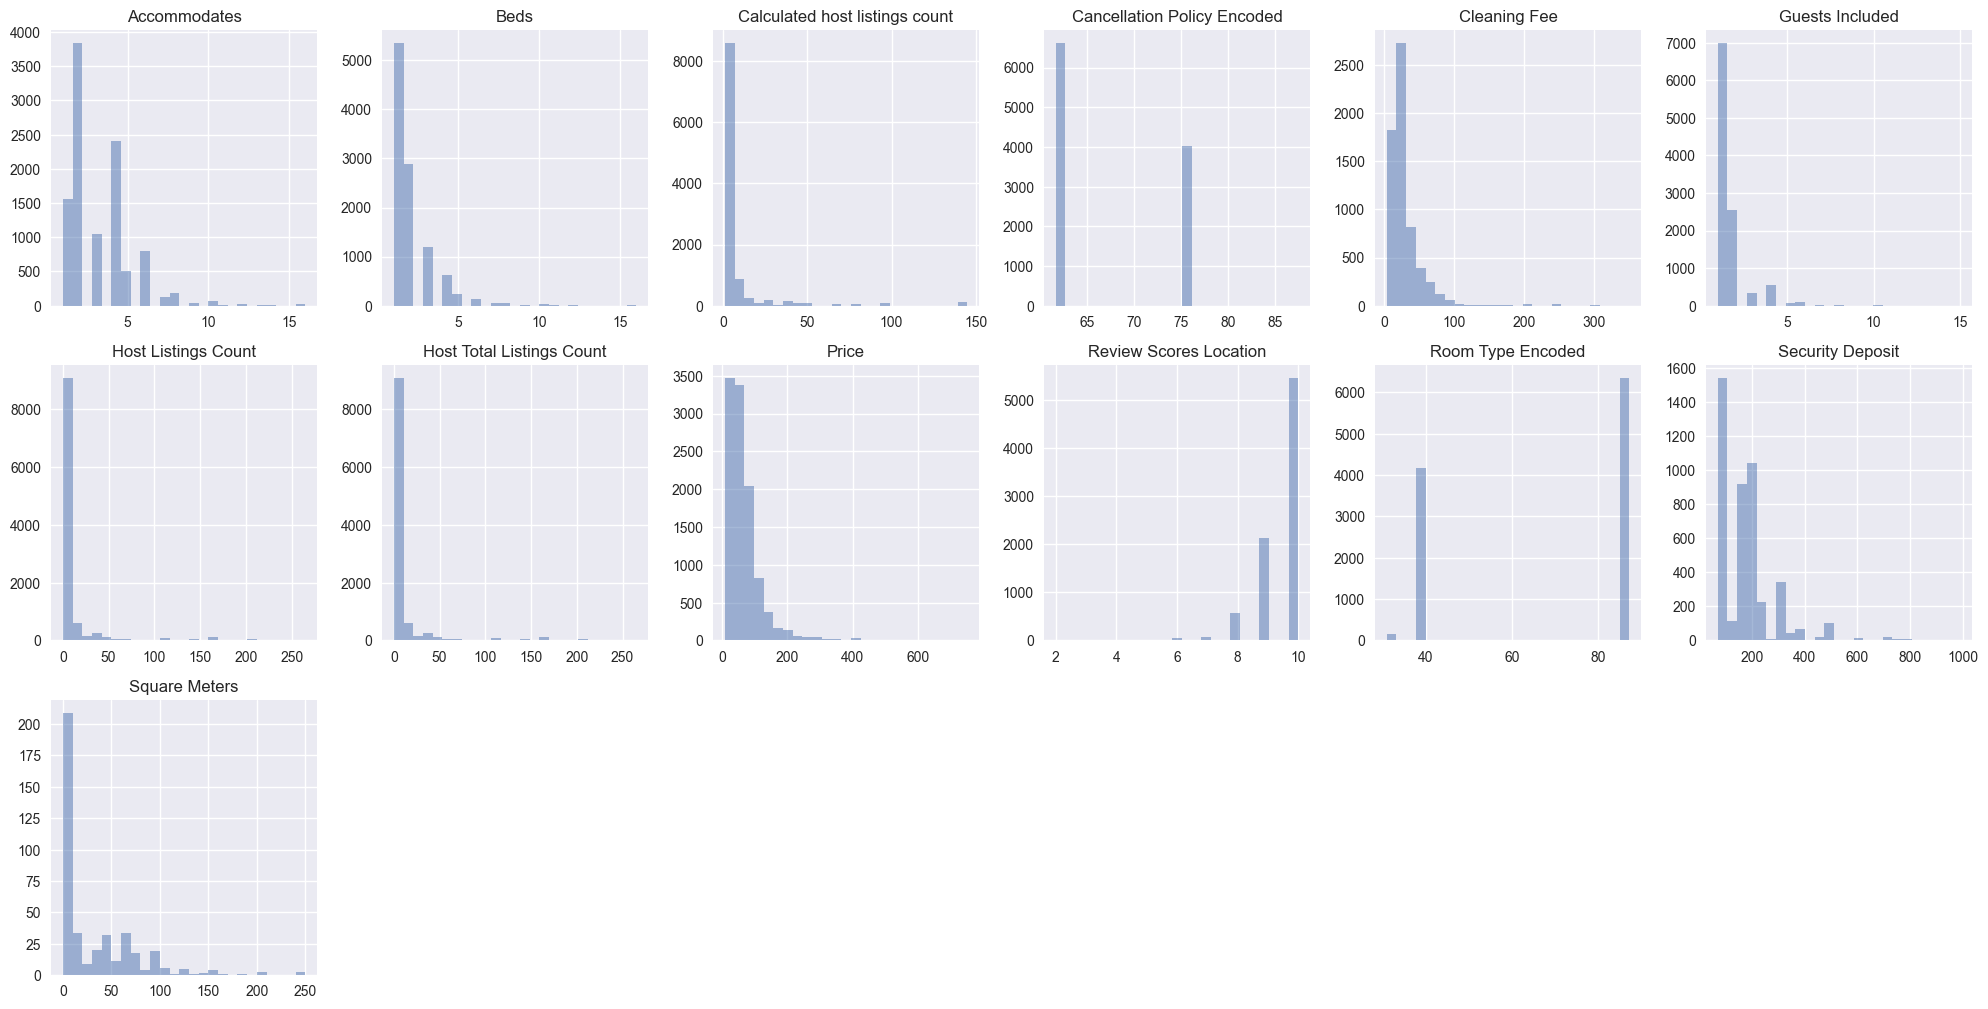

In [911]:
# distribución general de cada feature 

plt.figure(figsize=(20,20))

for i, feature in enumerate(madrid_data_filtered.columns, 1):
    plt.subplot(6, 6, i)
    madrid_data_filtered[feature].hist(alpha=0.5, bins=25, grid=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

**Anotaciones**
- **Accommodates**: Los alojamientos suelen tener más capacidad para menos de 5 personas.
- **Calculated host listings count**: los host tienen pocas propiedades listadas, pero hay algunos, aunque se ve poco, con muchas.
- **Cancellation Policy Encoded**: La mayoría de los anuncios tienen politica de cancelación `strict` o `flexible`
- **Cleaning fee**: La mayoría son bajas, algunas tarifas altas.
- **Guests Included**: La mayoría no incluye guests gratis o pocos (1, 2).
- **Host Listings Coun**: la mayoría de los hosts tienen pocas propiedades, hay algunos con muchas.
- **Host Total Listings Count**: similar a la anterior, pero puede incluir propiedas no disponibles en el presente.
- **Review Scores Location**: Hay propiedades sin review pero las que tienen suelen ser buenas reviews.
- **Room Type Encoded**: La mayoría de propiedeades listadas son `Entire home/apt` o `Private room`.
- **Security Deposit**: La mayoría de propiedeades no tienen deposito, algunas con valores altos.
- **Square Meters**: Muchos datos faltantes, de los que hay, la mayoría de propiedades son mas bien pequeñas - medianas.

In [912]:
# veo la correlacion de estas features porque se me parecen mucho conceptualmente.
madrid_data_filtered[['Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']].corr()

,Host Listings Count,Host Total Listings Count,Calculated host listings count
Host Listings Count,1.000000,1.000000,0.925075
Host Total Listings Count,1.000000,1.000000,0.925075
Calculated host listings count,0.925075,0.925075,1.000000


In [913]:
# decido elimininar dos de las que tienen correlacion de 1 y la variable calculada para evitar redundancia
madrid_data_filtered = madrid_data_filtered.drop(
    columns=['Host Total Listings Count', 'Calculated host listings count']
)
madrid_data_filtered.head(1)

,Accommodates,Beds,Cancellation Policy Encoded,Cleaning Fee,Guests Included,Host Listings Count,Price,Review Scores Location,Room Type Encoded,Security Deposit,Square Meters
0,2,2.0,75.613592,45.0,1,2.0,70.0,10.0,87.145142,150.0,NaN


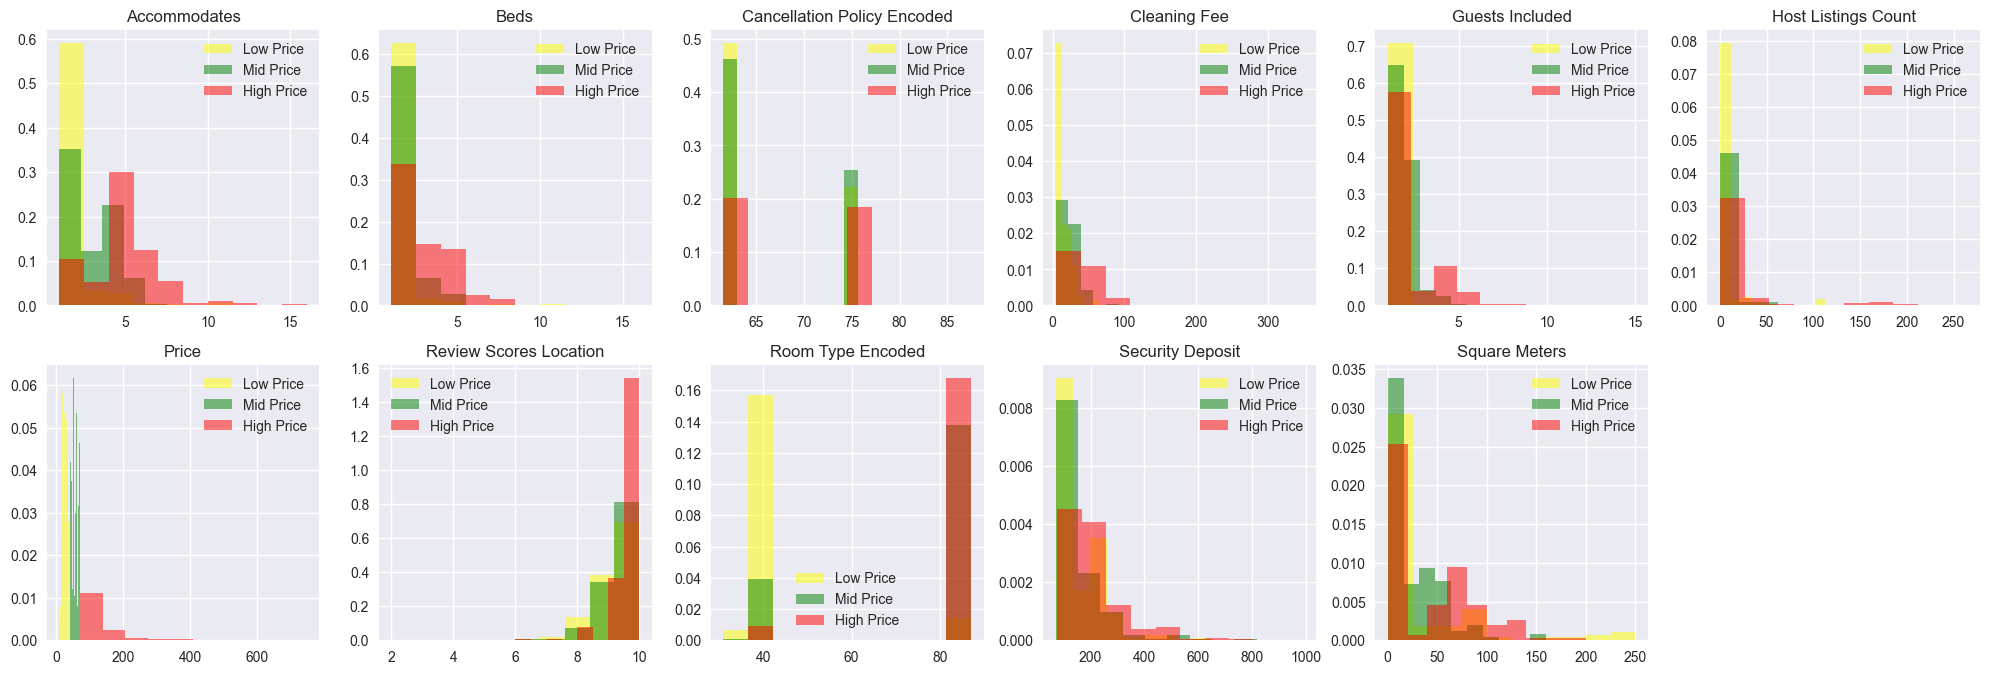

In [914]:
# ahora pinto los histogramas para cada feature respecto al precio categorizado 
# como bajo, medio, alto segun los percentiles:
low_limit = madrid_data_filtered['Price'].quantile(0.33)
mid_limit = madrid_data_filtered['Price'].quantile(0.66)

low_price = madrid_data_filtered['Price'] <= low_limit
mid_price = (madrid_data_filtered['Price'] > low_limit) & (madrid_data_filtered['Price'] <= mid_limit)
high_price = madrid_data_filtered['Price'] > mid_limit

plt.figure(figsize=(20, 20))

for i, feature in enumerate(madrid_data_filtered.columns):
    plt.subplot(6, 6, i + 1)
    plt.hist(madrid_data_filtered.loc[low_price, feature], density=1, alpha=0.5, label='Low Price', color='yellow')
    plt.hist(madrid_data_filtered.loc[mid_price, feature], density=1, alpha=0.5, label='Mid Price', color='green')
    plt.hist(madrid_data_filtered.loc[high_price, feature], density=1, alpha=0.5, label='High Price', color='red')
    plt.legend()
    plt.title(feature)
plt.tight_layout()
plt.show()

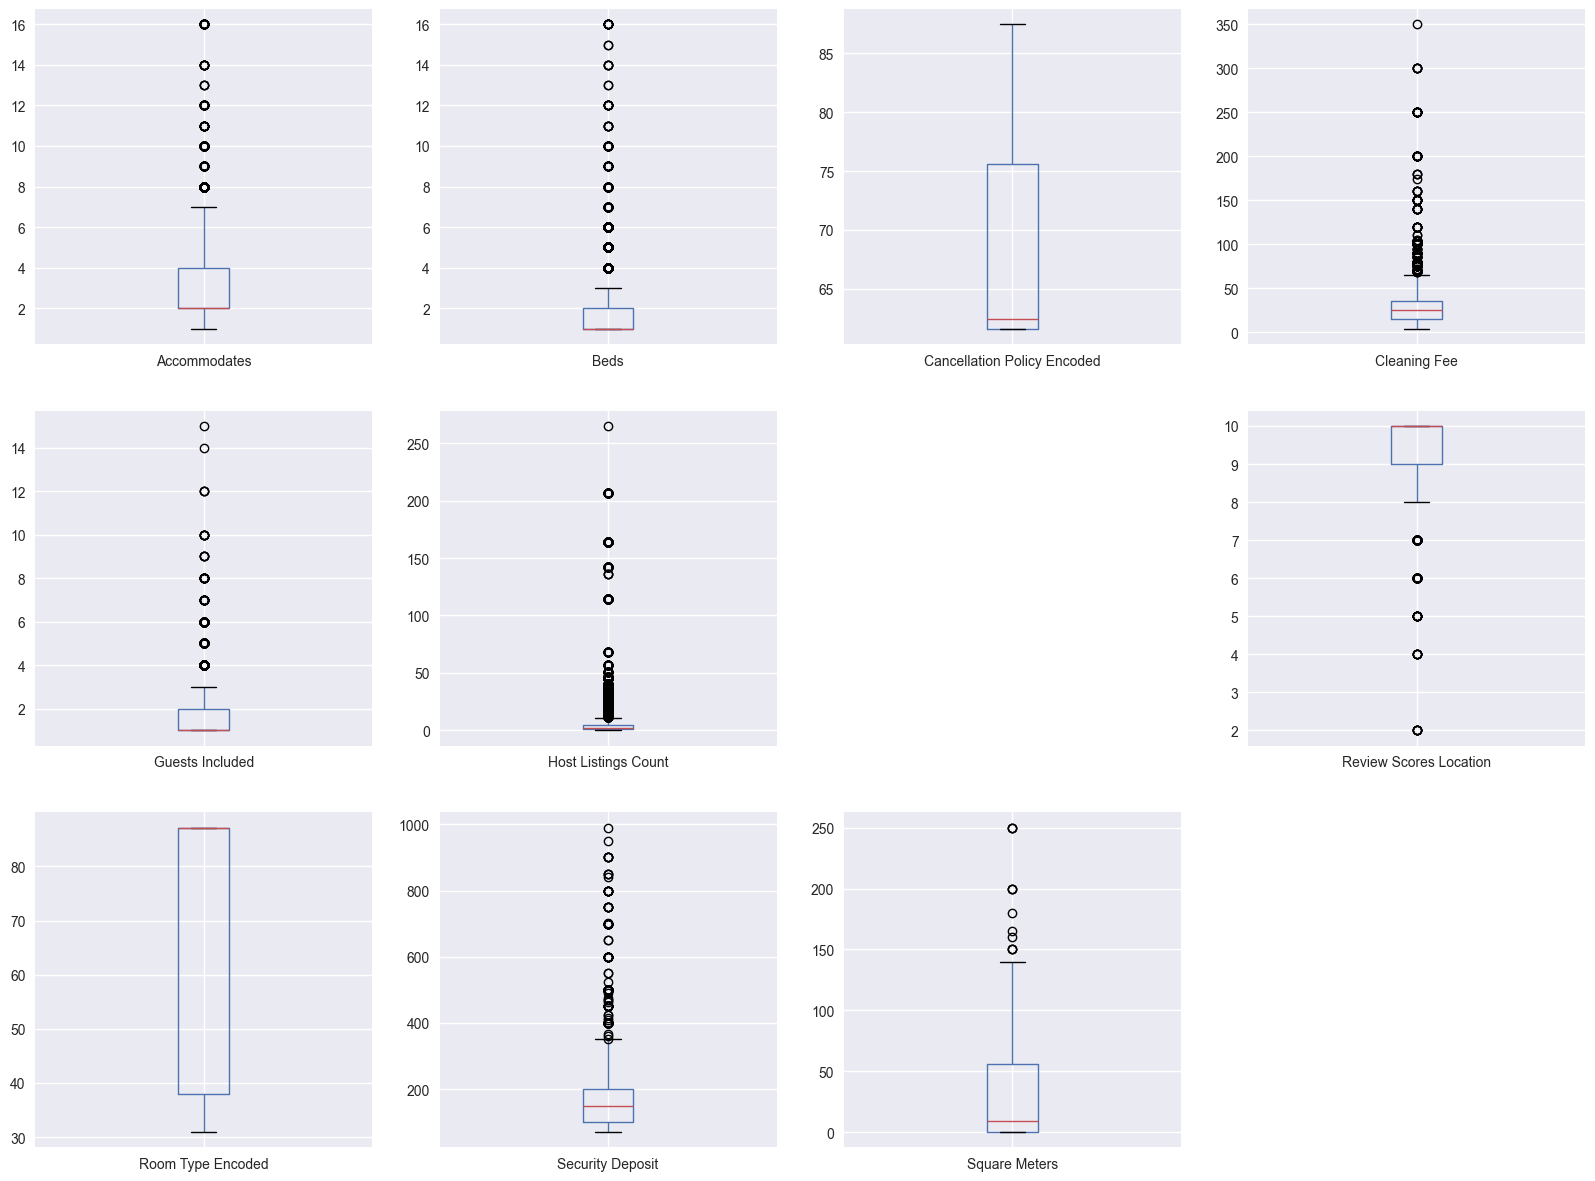

In [915]:
# visualizo box plots para ver outlieres
plt.figure(figsize=(20, 20))

for i, feature in enumerate(madrid_data_filtered.columns, 1):
    if feature == 'Price': 
        continue # skip price
    plt.subplot(4, 4, i)
    madrid_data_filtered.boxplot(column=feature, vert=True)

plt.show()

Veo la estadística de todas las features para determinar la media, desviación estándar, posiblemente cuartiles de cada una de las variables y ver outliers.

In [916]:
madrid_data_filtered.describe().T.sort_values(by='count', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Square Meters,417.0,32.222191,44.555196,0.000000,0.000000,9.290300,56.020509,250.001973
Security Deposit,4497.0,183.059595,109.692935,70.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,6277.0,29.638522,25.869084,4.000000,15.000000,25.000000,35.000000,350.000000
Review Scores Location,8307.0,9.538221,0.775297,2.000000,9.000000,10.000000,10.000000,10.000000
Beds,10615.0,1.968064,1.487850,1.000000,1.000000,1.000000,2.000000,16.000000
Host Listings Count,10647.0,9.831971,27.554701,0.000000,1.000000,2.000000,5.000000,265.000000
Accommodates,10650.0,3.172770,1.975341,1.000000,2.000000,2.000000,4.000000,16.000000
Cancellation Policy Encoded,10650.0,67.157200,6.620798,61.621983,61.621983,62.399320,75.613592,87.480282
Guests Included,10650.0,1.570235,1.072364,1.000000,1.000000,1.000000,2.000000,15.000000
Price,10650.0,67.168451,60.007610,9.000000,30.000000,52.000000,80.000000,750.000000


A simple vista puedo ver outliers en ciertas features porque el valor máximo es mucho mas alto que la media.

'Square Meters', 'Security Deposit', 'Cleaning Fee', 'Host Listings Count', 'Accommodates', 'Guests Included'

##### Eliminacion de outliers

Veo la correlacion de las variables que me quedan con precio.

In [917]:
madrid_data_filtered.corr(method="pearson")['Price'].sort_values(ascending=True)

Cancellation Policy Encoded    0.111004
Review Scores Location         0.153188
Host Listings Count            0.170477
Square Meters                  0.232546
Guests Included                0.334494
Security Deposit               0.349740
Room Type Encoded              0.404716
Beds                           0.431721
Accommodates                   0.514577
Cleaning Fee                   0.648182
Price                          1.000000
Name: Price, dtype: float64

Cancellation Policy Encoded tiene una relacion muy baja con el precio.

Policies de un tipo de cancelación no necesariamente implican un precio mas alto. 

Voy a eliminarla.  

In [918]:
madrid_data_filtered = madrid_data_filtered.drop(
    columns=['Cancellation Policy Encoded']
)
madrid_data_filtered.head(1)

,Accommodates,Beds,Cleaning Fee,Guests Included,Host Listings Count,Price,Review Scores Location,Room Type Encoded,Security Deposit,Square Meters
0,2,2.0,45.0,1,2.0,70.0,10.0,87.145142,150.0,NaN


In [919]:
# listo los lower y upper bounds para cada feature
features = madrid_data_filtered.columns

for col in features:
    Q1 = madrid_data_filtered[col].quantile(0.25)
    Q3 = madrid_data_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"{col}: {lower_limit} | {upper_limit}")

Accommodates: -1.0 | 7.0
Beds: -0.5 | 3.5
Cleaning Fee: -15.0 | 65.0
Guests Included: -0.5 | 3.5
Host Listings Count: -5.0 | 11.0
Price: -45.0 | 155.0
Review Scores Location: 7.5 | 11.5
Room Type Encoded: -35.75465975180218 | 160.88502274718783
Security Deposit: -50.0 | 350.0
Square Meters: -84.03076349999999 | 140.05127249999998


##### Scatter Plots

- Sirve para ver la tendencia
- Ver si hay outliers
- Ver distribucion de la variable o si los valores estan al azar
- Hay puntos donde la variable no afecta el precio

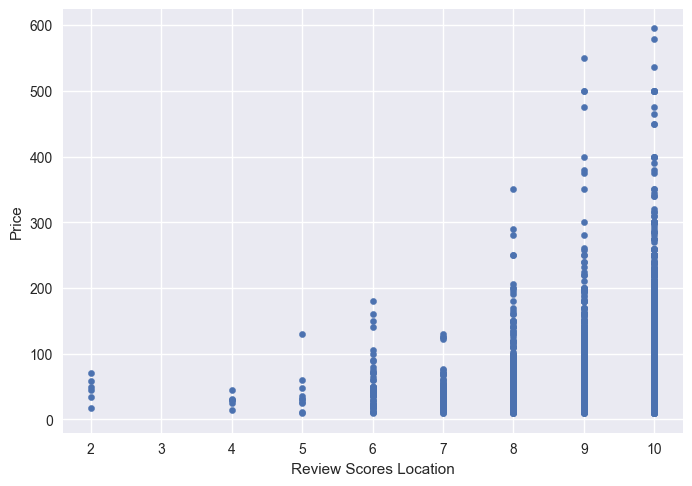

In [920]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Review Scores Location', y = 'Price')
plt.xlabel('Review Scores Location')
plt.ylabel('Price')
plt.show()

Parece que los sitios con mejor location tienen mejor precio.  Relación lineal.

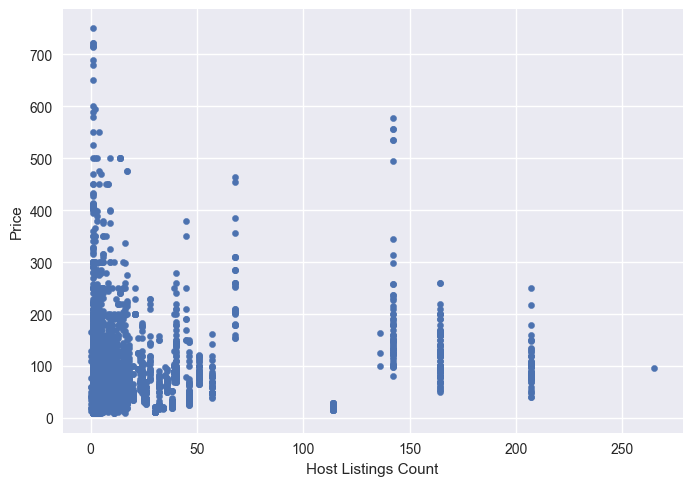

In [921]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Host Listings Count', y = 'Price')
plt.xlabel('Host Listings Count')
plt.ylabel('Price')
plt.show()

In [922]:
# filtro valores de Host Listings Count menores o iguales a 100
madrid_data_filtered = madrid_data_filtered[madrid_data_filtered['Host Listings Count'] <= 100]

# Recalcular la correlación
new_corr = madrid_data_filtered[['Host Listings Count', 'Price']].corr().iloc[0,1]
print(f"Nueva correlación después de eliminar outliers: {new_corr}")

# la correlación ya era baja (0.17), y ahora es aún menor (0.13). Borro la variable
madrid_data_filtered = madrid_data_filtered.drop(
    columns=['Host Listings Count']
)

Nueva correlación después de eliminar outliers: 0.13530291374012932


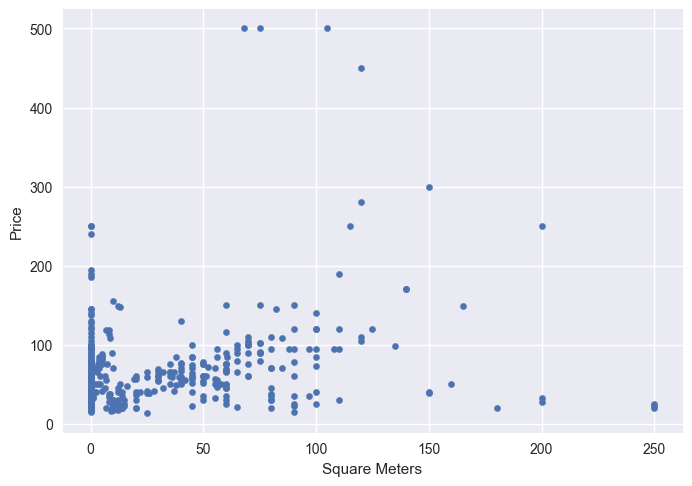

In [923]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Square Meters', y = 'Price')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

Es visible que para algunas propiedades, a mayor tamaño, mayor precio, pero no siempre ocurre. Hay dispersión en los datos. 

In [924]:
# filtro valores de Square Meters menores o iguales a 210
madrid_data_filtered = madrid_data_filtered[madrid_data_filtered['Square Meters'] <= 210]

# Recalcular la correlación
new_corr = madrid_data_filtered[['Square Meters', 'Price']].corr().iloc[0,1]
print(f"Nueva correlación después de eliminar outliers: {new_corr}")

# Mejora la correlación, antes era 0.232546

Nueva correlación después de eliminar outliers: 0.28886589834335535


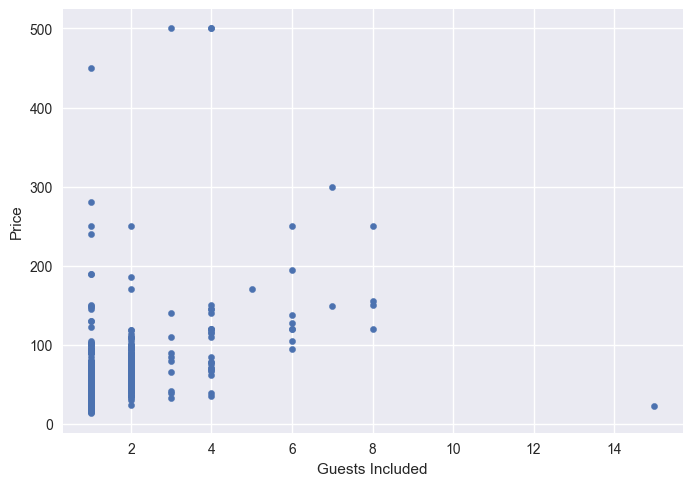

In [925]:
madrid_data_filtered.plot(kind = 'scatter',x = 'Guests Included', y = 'Price')
plt.xlabel('Guests Included')
plt.ylabel('Price')
plt.show()

No tiene una correlación muy fuerte, pero es positiva. Hay una leve relación con el precio de la propiedad, a mayor número de guests included, los precios parecen ser algo mas altos. No hago hada con la variable.

In [926]:
# elimino oulieres de Guests Included
madrid_data_filtered = madrid_data_filtered[madrid_data_filtered['Guests Included'] <= 9]

# Nota: 
# hay datos que tienen mas número de guests included que accommodates. Esto puede ser un error.
# check later

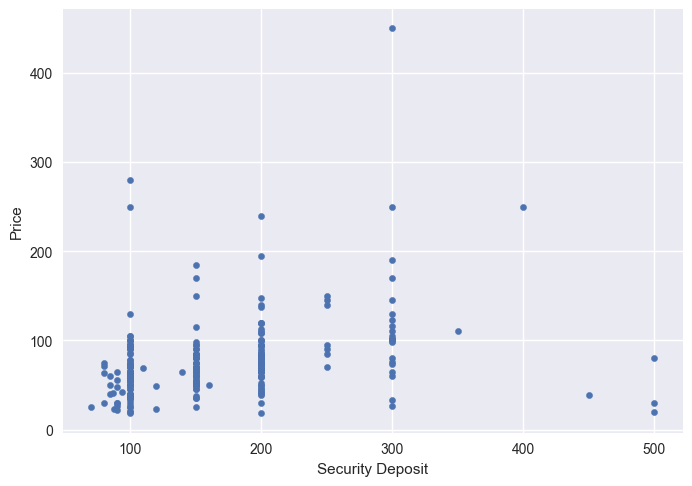

In [927]:
madrid_data_filtered.plot(kind = 'scatter',x = 'Security Deposit',y = 'Price')
plt.xlabel('Security Deposit')
plt.ylabel('Price')
plt.show()

Veo bastante dispersión de los datos con una ligera tendencia a mayor precio cuando mas deposito. Correlación es positiva 0.35

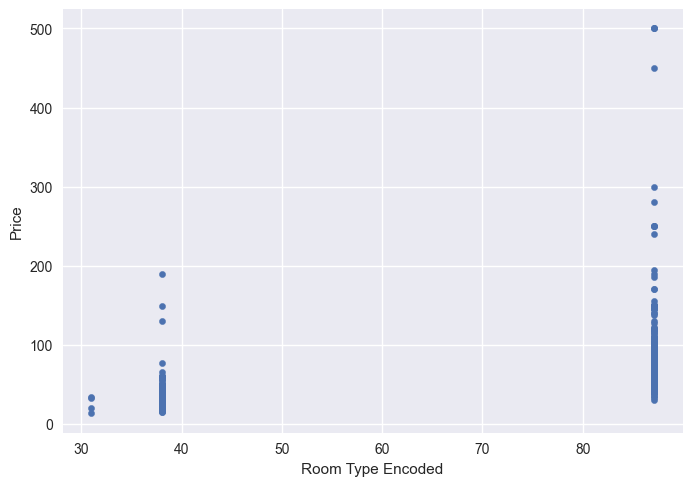

In [928]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Room Type Encoded', y = 'Price')
plt.xlabel('Room Type Encoded')
plt.ylabel('Price')
plt.show()

Las habitaciones privadas o compartidas tienen precios mas bajos. Me quedo con la variable.

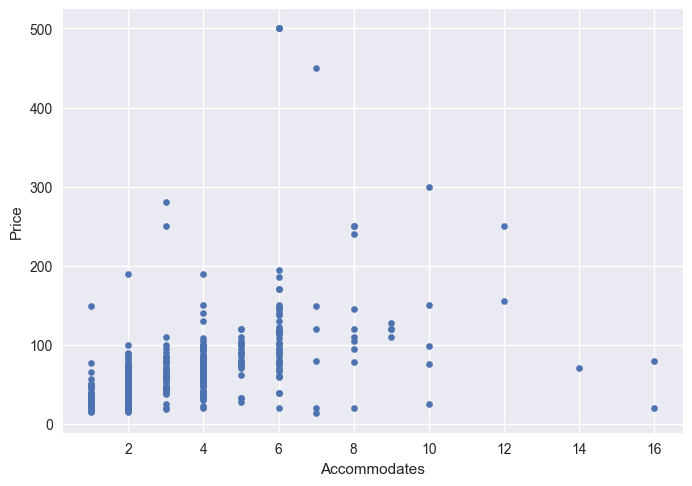

In [929]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Accommodates', y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

Tendencia no tan fuerte creciente de precios. La relación no es completamente lineal.

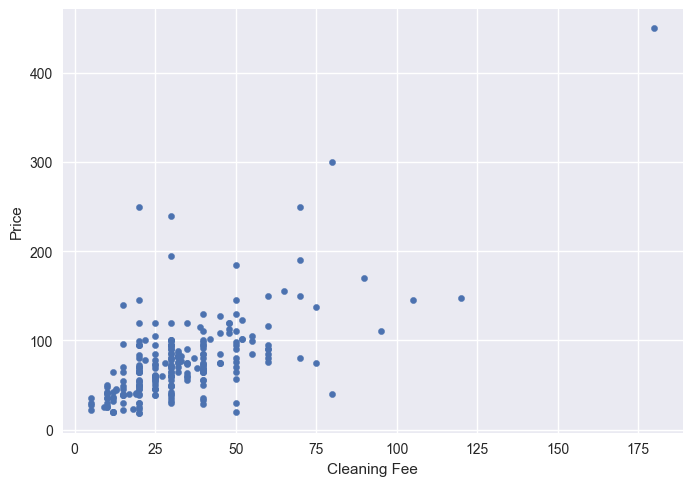

In [930]:
madrid_data_filtered.plot(kind = 'scatter', x = 'Cleaning Fee', y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Price')
plt.show()  

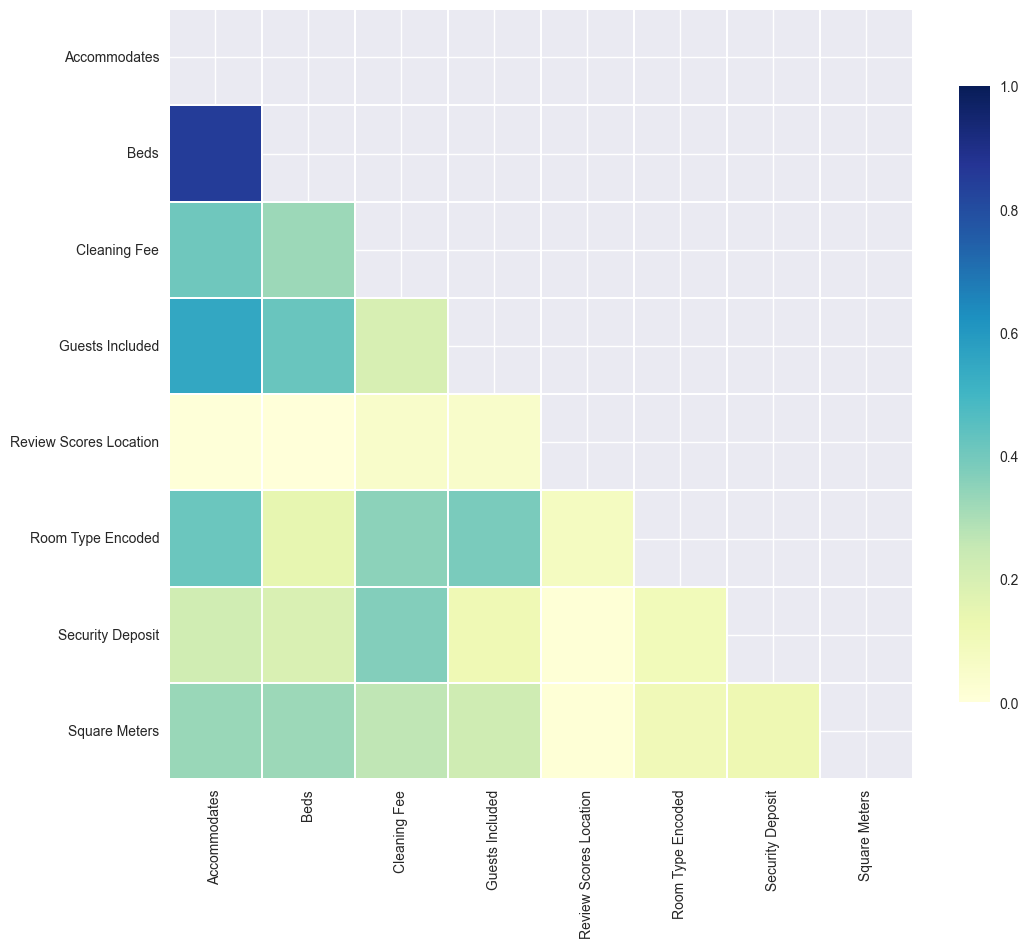

In [931]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(madrid_data_filtered.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5, linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}
)

plt.show()

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

KeyboardInterrupt: 

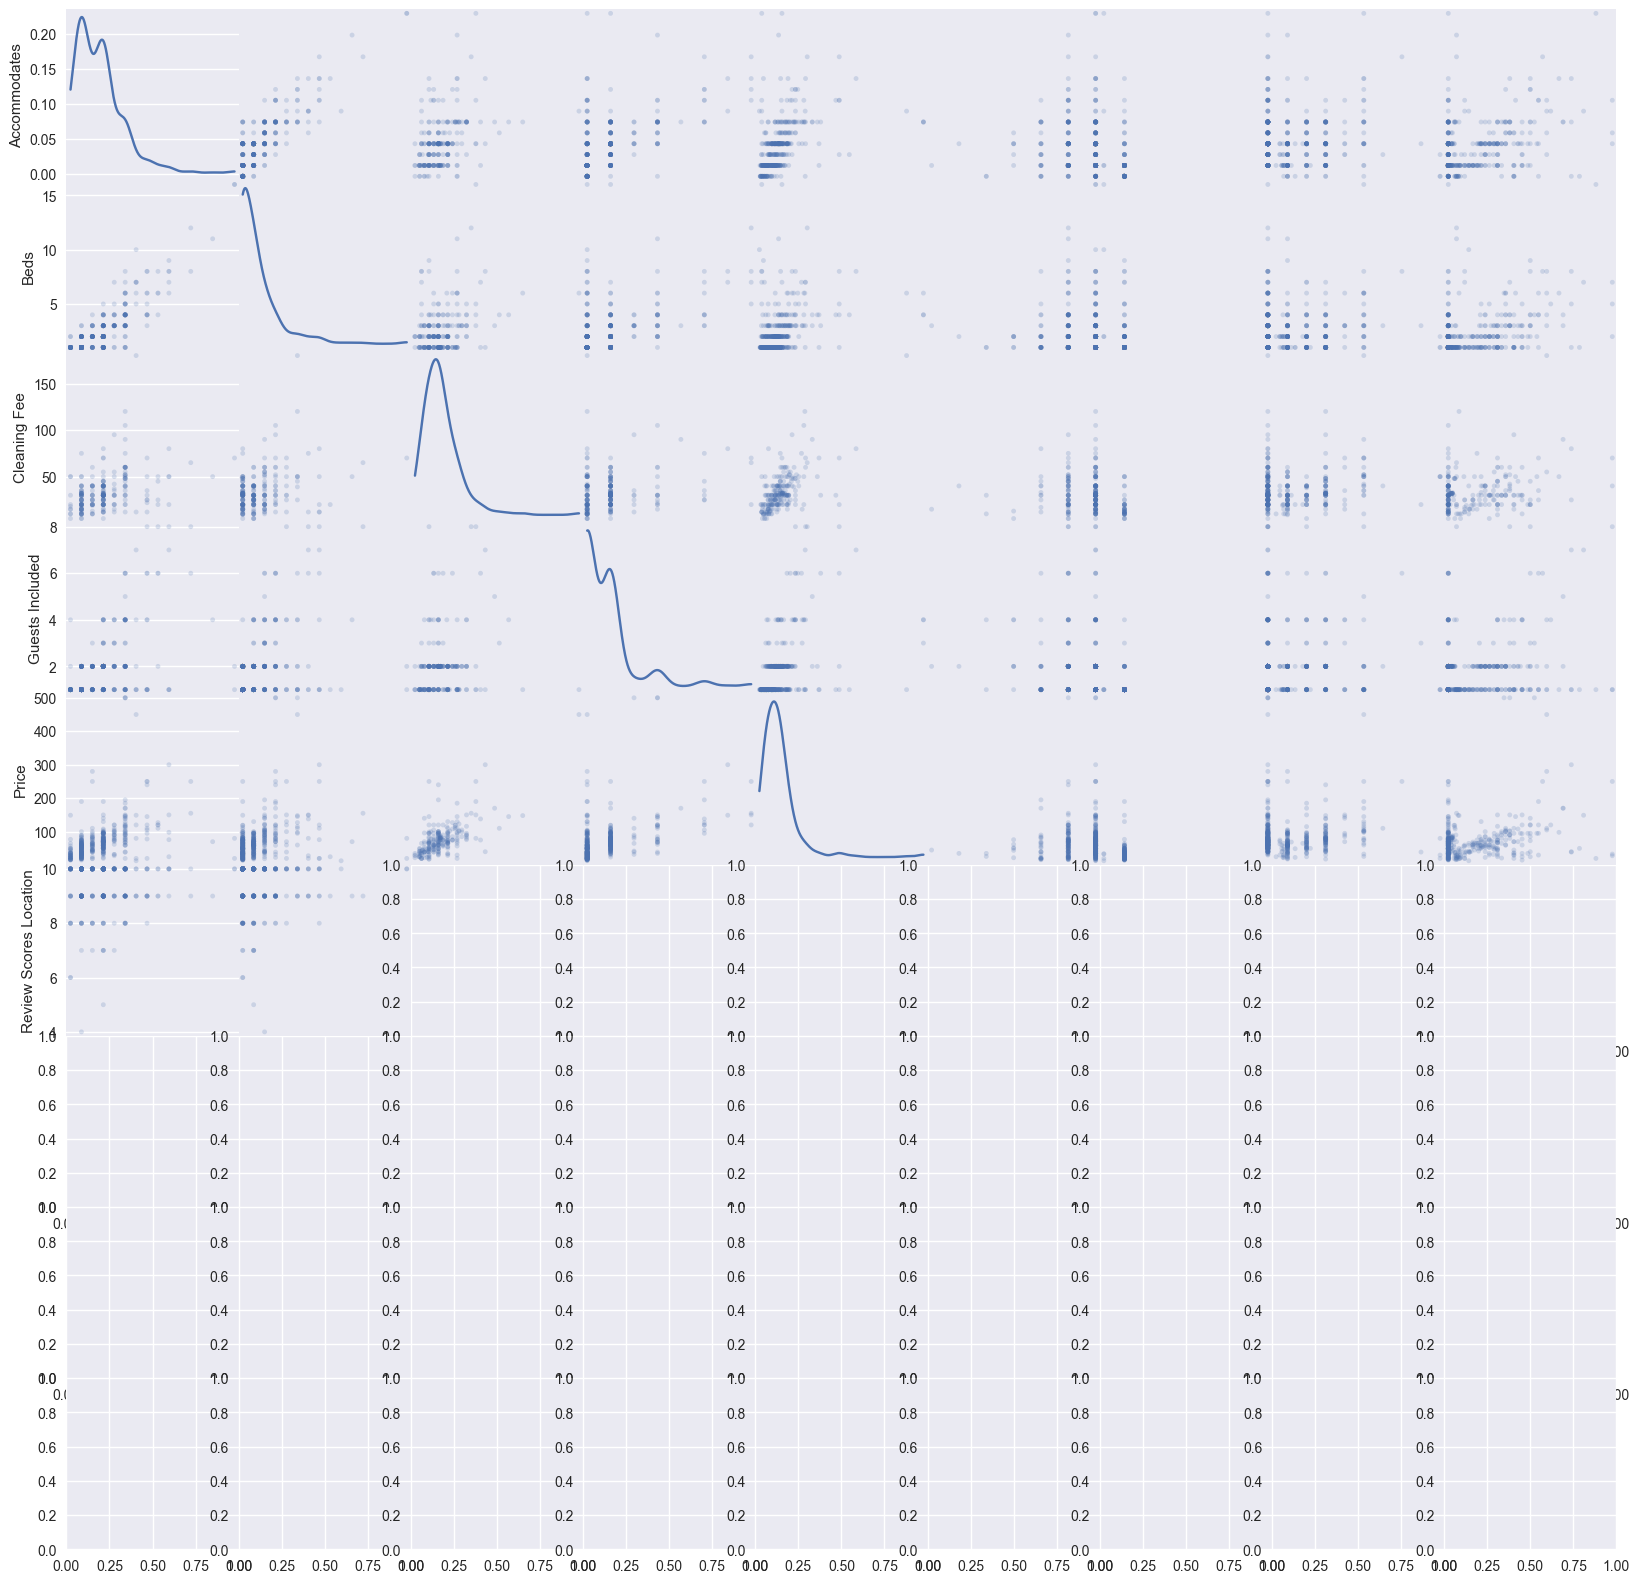

In [932]:
pd.plotting.scatter_matrix(madrid_data_filtered, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## 3. 🧠 Modelado, cross-validation y estudio de resultados train - test 🤖

Aplico las mismas imputaciones - codificaciones a dataset de test.

In [ ]:
# carga del dataset de train y trabajamos ÚNICAMENTE con él. 
madrid_data_test = pd.read_csv('./data/practica/airbnb_madrid_test.csv', sep=';', decimal='.')
madrid_data_test.head(1)

,Name,Summary,Space,Description,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Features
0,Localización excelente 3 personas,NaN,Apartamento equipado con todas las comodidades...,Apartamento equipado con todas las comodidades...,Agus,2012-11-07,"Madrid, Madrid, Spain",within an hour,94.0,10.0,10.0,"email,phone,facebook,reviews","Madrid, España 28004, Spain",Universidad,Centro,Madrid,España,28004,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,90.0,NaN,NaN,1,0,1,365,5 days ago,11,33,57,332,24,89.0,9.0,9.0,9.0,9.0,9.0,9.0,flexible,10.0,"Host Has Profile Pic,Requires License,Require ..."


**Equivalente a pipeline**

In [ ]:
# imputaciones
fill_missing_values(madrid_data_test, 'Host Response Time', 'unknown')
fill_missing_values(madrid_data_test, 'Bathrooms', madrid_data_test['Bathrooms'].median)
fill_missing_values(madrid_data_test, 'Bedrooms', madrid_data_test['Bedrooms'].median)
fill_missing_values(madrid_data_test, 'Beds', madrid_data_test['Beds'].median)

# codificaciones
madrid_data_test['Room Type Encoded'] = calc_smooth_mean(madrid_data_test, by='Room Type', on='Price', m=3)
madrid_data_test.drop(columns=['Room Type'], inplace=True)
madrid_data_test['Host Response Time Ordinal'] = madrid_data_test['Host Response Time'].map(host_response_time_dict)
madrid_data_test.drop(columns=['Host Response Time'], inplace=True)
madrid_data_test['Bed Type Encoded'] = calc_smooth_mean(madrid_data_test, by='Bed Type', on='Price', m=5)
madrid_data_test.drop(columns=['Bed Type'], inplace=True)
madrid_data_test['Cancellation Policy Encoded'] = calc_smooth_mean(madrid_data_test, by='Cancellation Policy', on='Price', m=5)
madrid_data_test.drop(columns=['Cancellation Policy'], inplace=True)

# transformaciones
madrid_data_test['Square Meters'] = madrid_data_test['Square Feet'].apply(lambda x: x *  0.092903 if pd.notna(x) else x)
madrid_data_test.drop(columns=['Square Feet'], inplace=True)

madrid_data_test['Years Host'] = (pd.to_datetime('today') - pd.to_datetime(madrid_data_test['Host Since'])).dt.days / 365
madrid_data_test.drop(columns=['Host Since'], inplace=True)

numeric_features_test = sorted(madrid_data.select_dtypes(include=['int64', 'float64']))
madrid_data_filtered_test = madrid_data_test[numeric_features_test]
madrid_data_filtered_test.head(1)

# eliminacion de variables
madrid_data_filtered_test = madrid_data_filtered_test.drop(
    columns=sorted(correlation_with_price[correlation_with_price.abs() < 0.1].index.tolist())
)
madrid_data_filtered_test = madrid_data_filtered_test.drop(
    columns=[
        'Host Total Listings Count', 
        'Calculated host listings count', 
        'Cancellation Policy Encoded', 
        'Host Listings Count'
    ]
)

# filtros
madrid_data_filtered_test = madrid_data_filtered_test[madrid_data_filtered_test['Square Meters'] <= 210]
madrid_data_filtered_test = madrid_data_filtered_test[madrid_data_filtered_test['Guests Included'] <= 9]

0
0
0
0


In [ ]:
# reodeno los DataFrame para training y test con feature `Price` en la primera columna.
columns = ['Price'] + [col for col in madrid_data_filtered.columns if col != 'Price']
madrid_data_filtered = madrid_data_filtered[columns]

columns_test = ['Price'] + [col for col in madrid_data_filtered_test.columns if col != 'Price']
madrid_data_filtered_test = madrid_data_filtered_test[columns_test]

Preparación de los datos separando la variable objetivo `Price` del resto de features.

Losd DataFrame de Pandas son convertido en array de NumPy para trabajar con scikit-learn.

In [ ]:
# Dataset de train
madrid_data_train = madrid_data_filtered.values
madrid_data_test = madrid_data_filtered_test.values

# variables predictoras y variable objetivo de train
X_train = madrid_data_train[:,1:]
y_train = madrid_data_train[:,0:1]

# variables predictoras y variable objetivo de test
X_test = madrid_data_test[:,1:]
y_test = madrid_data_test[:,0:1]

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (413, 8)
y_train.shape: (413, 1)
X_test.shape: (100, 8)
y_test.shape: (100, 1)


Normalizamos con los datos de train

In [ ]:
from sklearn.impute import SimpleImputer

# X_train contiene NaN values.
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# ajusta el escalador a los datos de entrenamiento
scaler = StandardScaler().fit(X_train_imputed)

# transforma los datos de entrenamiento
X_train_scaled = scaler.transform(X_train_imputed)

# transforma los datos de testing usando el mismo escalador usado en fit train
X_test_scaled = scaler.transform(X_test_imputed) 

print('Datos train: ', X_train_scaled.shape)
print('Datos  test: ', X_test_scaled.shape)

Datos train:  (413, 8)
Datos  test:  (100, 8)


Aplicar Validación Cruzada (k-Fold) para evitar Overfitting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


alpha_vector = np.logspace(-3, 3, 25)  # desde 10^(-3) hasta 10^3 en 25 valores
param_grid = { 'alpha': alpha_vector }

grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid.fit(X_train_scaled, y_train)

print("Mejor param:", grid.best_params_)
print("Mejor root mean cross-validation score:", -grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................alpha=0.0017782794100389228; total time=   0.0s
[CV] END ........................alpha=0.0017782794100389228; total time=   0.0s
[CV] END ........................alpha=0.0017782794100389228; total time=   0.0s
[CV] END ........................alpha=0.0017782794100389228; total time=   0.0s
[CV] END ........................alpha=0.0017782794100389228; total time=   0.0s
[CV] END ........................alpha=0.0031622776601683794; total time=   0.0s
[CV] END ........................alpha=0.003162

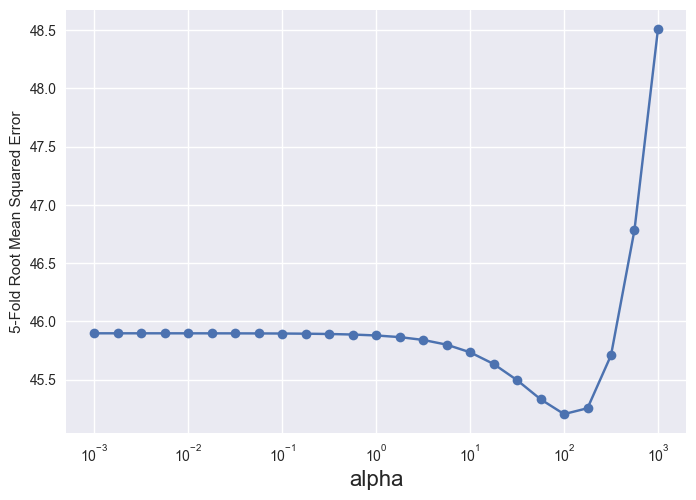

In [ ]:
# visualiza performance vs complejidad
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold Root Mean Squared Error')
plt.show()

El punto óptimo es donde el RMSE es mínimo (alpha 10^2) antes de que empiece a subir. Luego el RSME aumenta muy rapido y el modelo se vuelve poco flexible y no capta las relaciones entre variables, es decir entra en uderfitting.

Solución --> Lo mejor es explorar otros modelos. 

De todas maneras voy a evaluar el modelo es test.

In [ ]:
from sklearn.metrics import mean_squared_error

# train the final model with the best alpha
best_alpha = grid.best_params_['alpha']
ridge_best = Ridge(alpha=best_alpha).fit(X_train_scaled, y_train)

# predictions
y_train_pred = ridge_best.predict(X_train_scaled)
y_test_pred = ridge_best.predict(X_test_scaled)

# evaluate performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"RMSE on Train: {np.sqrt(mse_train):.2f}")
print(f"RMSE on Test: {np.sqrt(mse_test):.2f}")

RMSE on Train: 45.94
RMSE on Test: 24.71


In [ ]:
print("Number of features in X_train_scaled:", X_train_scaled.shape[1])
print("Number of coefficients:", len(grid.best_estimator_.coef_))

Number of features in X_train_scaled: 8
Number of coefficients: 8


In [ ]:
# importancia de las features
feature_names = madrid_data_filtered.drop(columns=['Price']).columns

print("Number of features:", len(feature_names))
print("Number of coefficients:", len(grid.best_estimator_.coef_))


feature_importance = pd.DataFrame({ 'Feature': feature_names, 'Coefficient': grid.best_estimator_.coef_ })
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance

Number of features: 8
Number of coefficients: 8


,Feature,Coefficient
2,Cleaning Fee,12.017175
3,Guests Included,11.102861
5,Room Type Encoded,11.036401
7,Square Meters,6.723039
0,Accommodates,5.821083
4,Review Scores Location,4.365666
6,Security Deposit,2.842375
1,Beds,1.931806


## 4. 🔄 Intentar otro approach

Utilizo el dataset después de haberlo filtrado solo para Madrid, de hacer imputaciones, codificaciones y algunas transformaciones resultado del punto 2.4.

In [ ]:
madrid_data_second.head()

,Accommodates,Availability 30,Availability 365,Availability 60,Availability 90,Bed Type Encoded,Beds,Calculated host listings count,Cancellation Policy Encoded,Cleaning Fee,Extra People,Guests Included,Host Listings Count,Host Response Rate,Host Total Listings Count,Maximum Nights,Minimum Nights,Number of Reviews,Price,Review Scores Accuracy,Review Scores Checkin,Review Scores Cleanliness,Review Scores Communication,Review Scores Location,Review Scores Rating,Review Scores Value,Room Type Encoded,Security Deposit,Square Meters,Years Host
0,2,23,332,41,71,67.502675,2.0,1.0,75.613592,45.0,0,1,2.0,100.0,2.0,365,3,9,70.0,9.0,9.0,10.0,9.0,10.0,90.0,9.0,87.145142,150.0,NaN,12.060274
1,8,7,247,19,34,67.502675,5.0,6.0,75.613592,50.0,20,6,7.0,100.0,7.0,365,1,26,160.0,9.0,9.0,9.0,9.0,10.0,88.0,9.0,87.145142,300.0,NaN,10.824658
2,1,0,311,6,36,67.502675,1.0,38.0,75.613592,NaN,0,1,38.0,NaN,38.0,1125,7,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.985221,NaN,NaN,8.043836
3,4,7,329,28,54,67.502675,1.0,5.0,62.399320,30.0,15,2,5.0,100.0,5.0,3,2,6,78.0,10.0,9.0,10.0,9.0,10.0,100.0,10.0,87.145142,96.0,NaN,8.068493
4,6,15,20,20,20,67.502675,4.0,1.0,62.399320,NaN,0,1,1.0,95.0,1.0,1125,2,14,99.0,9.0,10.0,9.0,10.0,9.0,88.0,9.0,87.145142,NaN,NaN,10.542466


### 4.1 🛠️ Explorar ydata Profiler 📦

In [ ]:
!pip install ydata-profiling
!pip install ipywidgets

In [ ]:
# vamos a usar profiling para obtener un analisis de los datos
from ydata_profiling import ProfileReport
profile = ProfileReport(madrid_data_second, title="Profiling Report - Airbnb")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Estudio de Relación entre Square Meters y Otras Variables
La idea es rellenar los valores nulos de square meters con el resultado de entrenar un modelo con las variables con que mas se relaciona.

In [ ]:
madrid_data_second['Square Meters'].isnull().sum()

np.int64(10233)

In [ ]:
# variables numéricas
num_features = madrid_data_second.select_dtypes(include=['float64', 'int64']).columns

# matriz de correlación
corr_matrix = madrid_data_second[num_features].corr()

# correlaciones con Square Meters
corr_square_meters = corr_matrix["Square Meters"].sort_values(ascending=False)
print(corr_square_meters.head(10))

Square Meters       1.000000
Beds                0.357316
Accommodates        0.342871
Price               0.232546
Cleaning Fee        0.203815
Guests Included     0.190130
Minimum Nights      0.092360
Security Deposit    0.087741
Bed Type Encoded    0.068638
Extra People        0.068540
Name: Square Meters, dtype: float64


Uso las variables mas correlacionadas con Squar Meters
- Beds (0.357)
- Accommodates (0.342)
- Price (0.232)
- Cleaning Fee (0.203)
- Guests Included (0.190)

In [ ]:
madrid_data_second['Square Meters'].isnull().sum()

np.int64(10233)

In [ ]:
# DataFrame con square meteres not null
sq_train = madrid_data_second[madrid_data_second["Square Meters"].notnull()]
sq_train.shape

(417, 30)

In [ ]:
# DataFrame con square meteres null
sq_missing = madrid_data_second[madrid_data_second["Square Meters"].isnull()]
sq_missing.shape

(10233, 30)

In [ ]:
# imputación a las variables predictoras
sq_related_features = ["Beds", "Accommodates", "Price", "Cleaning Fee", "Guests Included"]

sq_df_imputer = SimpleImputer(strategy="median")
X_sq_train = sq_df_imputer.fit_transform(sq_train[sq_related_features])
X_sq_missing = sq_df_imputer.transform(sq_missing[sq_related_features])

In [ ]:
from sklearn.preprocessing import StandardScaler

# ajusta el escalador a los datos de entrenamiento
scaler = StandardScaler().fit(X_sq_train)

# transforma los datos de entrenamiento
X_sq_train_scaled = scaler.transform(X_sq_train)

# transforma los datos de testing usando el mismo escalador usado en fit train
X_sq_test_scaled = scaler.transform(X_sq_missing) 

print('Datos train: ', X_sq_train_scaled.shape)
print('Datos  test: ', X_sq_test_scaled.shape)

Datos train:  (417, 5)
Datos  test:  (10233, 5)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# KNN para entrena con datos sin null
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_sq_train_scaled, sq_train["Square Meters"])  

# predecir valores de Square Meters faltantes
sq_predicted = knn.predict(X_sq_test_scaled)
sq_missing.loc[:, "Square Meters"] = sq_predicted
madrid_data_second.loc[madrid_data_second["Square Meters"].isnull(), "Square Meters"] = sq_predicted

In [ ]:
# Square Meters not nan values
print(madrid_data_second["Square Meters"].isnull().sum())

0


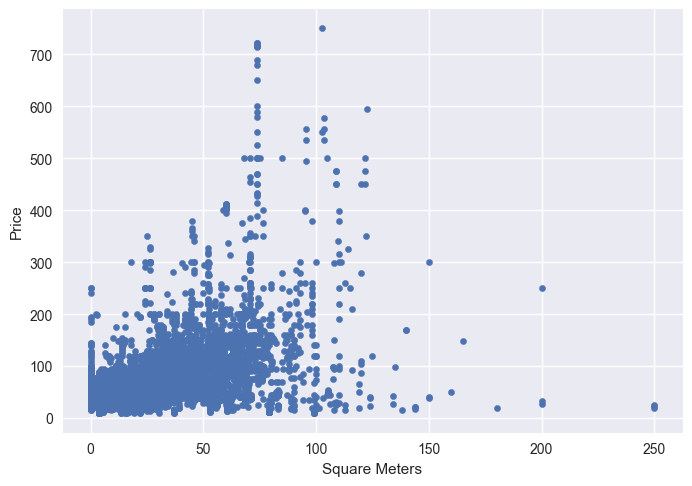

In [ ]:
madrid_data_second.plot(kind = 'scatter', x = 'Square Meters', y = 'Price')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

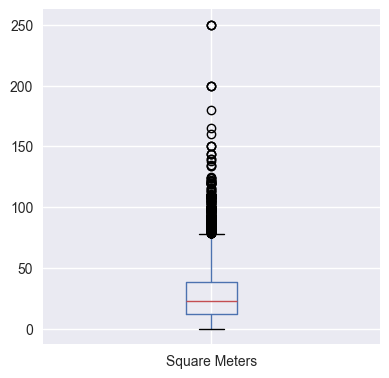

In [ ]:
# visualizo box plots para ver outlieres
plt.figure(figsize=(20, 20))
plt.subplot(4, 4, i)
madrid_data_second.boxplot(column='Square Meters', vert=True)
plt.show()

In [ ]:
sq_corr = madrid_data_filtered[['Square Meters', 'Price']].corr().iloc[0,1]
print(f"Square Meters - Price Correlation: {sq_corr}")

Square Meters - Price Correlation: 0.29280197500457733


In [ ]:
madrid_data_second = madrid_data_second[madrid_data_second['Square Meters'] <= 210]

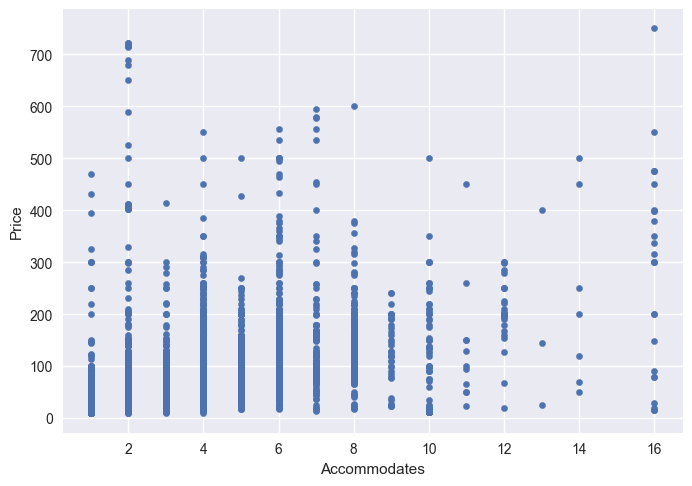

In [ ]:
madrid_data_second.plot(kind = 'scatter', x = 'Accommodates', y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

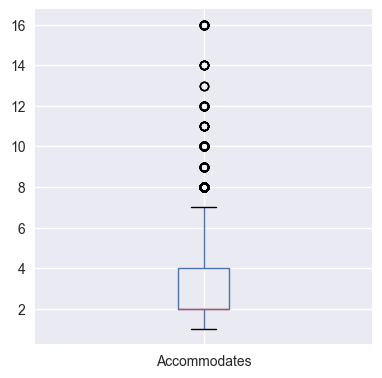

In [ ]:
# visualizo box plots para ver outlieres
plt.figure(figsize=(20, 20))
plt.subplot(4, 4, i)
madrid_data_second.boxplot(column='Accommodates', vert=True)
plt.show()

In [ ]:
# carga del dataset de train y trabajamos ÚNICAMENTE con él. 
madrid_data_second_test = pd.read_csv('./data/practica/airbnb_madrid_test.csv', sep=';', decimal='.')
madrid_data_second_test.head(1)



,Name,Summary,Space,Description,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Features
0,Localización excelente 3 personas,NaN,Apartamento equipado con todas las comodidades...,Apartamento equipado con todas las comodidades...,Agus,2012-11-07,"Madrid, Madrid, Spain",within an hour,94.0,10.0,10.0,"email,phone,facebook,reviews","Madrid, España 28004, Spain",Universidad,Centro,Madrid,España,28004,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,90.0,NaN,NaN,1,0,1,365,5 days ago,11,33,57,332,24,89.0,9.0,9.0,9.0,9.0,9.0,9.0,flexible,10.0,"Host Has Profile Pic,Requires License,Require ..."


In [ ]:
# imputaciones
fill_missing_values(madrid_data_second_test, 'Host Response Time', 'unknown')
fill_missing_values(madrid_data_second_test, 'Bathrooms', madrid_data_second_test['Bathrooms'].median)
fill_missing_values(madrid_data_second_test, 'Bedrooms', madrid_data_second_test['Bedrooms'].median)
fill_missing_values(madrid_data_second_test, 'Beds', madrid_data_second_test['Beds'].median)

# codificaciones
madrid_data_second_test['Room Type Encoded'] = calc_smooth_mean(madrid_data_second_test, by='Room Type', on='Price', m=3)
madrid_data_second_test.drop(columns=['Room Type'], inplace=True)
madrid_data_second_test['Host Response Time Ordinal'] = madrid_data_second_test['Host Response Time'].map(host_response_time_dict)
madrid_data_second_test.drop(columns=['Host Response Time'], inplace=True)
madrid_data_second_test['Bed Type Encoded'] = calc_smooth_mean(madrid_data_second_test, by='Bed Type', on='Price', m=5)
madrid_data_second_test.drop(columns=['Bed Type'], inplace=True)
madrid_data_second_test['Cancellation Policy Encoded'] = calc_smooth_mean(madrid_data_second_test, by='Cancellation Policy', on='Price', m=5)
madrid_data_second_test.drop(columns=['Cancellation Policy'], inplace=True)

# transformaciones
madrid_data_second_test['Square Meters'] = madrid_data_second_test['Square Feet'].apply(lambda x: x *  0.092903 if pd.notna(x) else x)
madrid_data_second_test.drop(columns=['Square Feet'], inplace=True)

madrid_data_second_test['Years Host'] = (pd.to_datetime('today') - pd.to_datetime(madrid_data_second_test['Host Since'])).dt.days / 365
madrid_data_second_test.drop(columns=['Host Since'], inplace=True)

numeric_features_test2 = sorted(madrid_data.select_dtypes(include=['int64', 'float64']))
madrid_data_second_test_filtered = madrid_data_second_test[numeric_features_test2]

0
0
0
0


In [ ]:
# reodeno los DataFrame para training y test con feature `Price` en la primera columna.
columns = ['Price'] + [col for col in madrid_data_second.columns if col != 'Price']
madrid_data_second = madrid_data_second[columns]

In [ ]:
columns_test = ['Price'] + [col for col in madrid_data_second_test_filtered.columns if col != 'Price']
madrid_data_second_test = madrid_data_second_test_filtered[columns_test]

In [ ]:
# Dataset de train
madrid_data_second_train = madrid_data_second.values
madrid_data_second_test = madrid_data_second_test.values

# variables predictoras y variable objetivo de train
X_second_train = madrid_data_second_train[:,1:]
y_second_train = madrid_data_second_train[:,0:1]

# variables predictoras y variable objetivo de test
X_second_test = madrid_data_second_test[:,1:]
y_second_test = madrid_data_second_test[:,0:1]

print(f"X_train.shape: {X_second_train.shape}")
print(f"y_train.shape: {y_second_train.shape}")
print(f"X_test.shape: {X_second_test.shape}")
print(f"y_test.shape: {y_second_test.shape}")

X_train.shape: (10647, 29)
y_train.shape: (10647, 1)
X_test.shape: (2663, 29)
y_test.shape: (2663, 1)


In [ ]:
# unfinished - entrenar otro modelo lasso o random forest